# <h1><center> GODAS OpenDAP server connector </center></h1>

This is a connector to the NCEP Global Ocean Data Assimilation System (GODAS) ocean reanalysis.
Appropriate citation information can be found on this page http://apdrc.soest.hawaii.edu/datadoc/godas_pentad.php

Interaction with the data in python can be done using the xarray library only which we install here

In [1]:
import sys
!{sys.executable} -m pip install xarray

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


We can now load the library

In [2]:
import xarray as xr

Here we use the opendap server maintained by the Asia-Pacific data-research center at university of Hawaii.
The averaging window and grid over which data are available can be explored using the browser using the following url: http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/GODAS
We select are the 5 day average data on the temperature grid and connect to the dataset.

In [3]:
dset = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/Reanalysis_Data/GODAS/pentad/tgrid')

A number of variables are available from that url

In [4]:
for var_name in dset.data_vars:
    print(var_name, dset.variables[var_name].attrs['long_name'])

potdsl ** (profile) potential temp. [k] 
dbssbmxl ** bottom ocn mixed layer geometric depth below sea surface [m] 
dbssbitl ** bottom ocn isothermal layer geometric depth below sea surface [m] 
saltydsl ** (profile) salinity [kg/kg] 
sltflsfc ** surface salt flux [g/cm^2/s] 
sshgsfc ** surface sea surface height relative to geoid [m] 
thflxsfc ** surface total downward heat flux at surface [w/m^2] 


Let's select the potential temperature. The field is a 3D field and has 3 dimensions of space (lon:longitude. lat:latitude, lev:depth) and one of time

In [5]:
print(dset.potdsl.dims)

('time', 'lev', 'lat', 'lon')


More information on the dimensions can be found in the dataset object

In [6]:
print("Level dimension:", dset.lev)
print("Time dimension:", dset.time)

Level dimension: <xarray.DataArray 'lev' (lev: 40)>
array([   5.,   15.,   25.,   35.,   45.,   55.,   65.,   75.,   85.,   95.,
        105.,  115.,  125.,  135.,  145.,  155.,  165.,  175.,  185.,  195.,
        205.,  215.,  225.,  238.,  262.,  303.,  366.,  459.,  584.,  747.,
        949., 1193., 1479., 1807., 2174., 2579., 3016., 3483., 3972., 4478.])
Coordinates:
  * lev      (lev) float64 5.0 15.0 25.0 35.0 ... 3.483e+03 3.972e+03 4.478e+03
Attributes:
    grads_dim:      z
    grads_mapping:  levels
    units:          millibar
    long_name:      altitude
    minimum:        5.0
    maximum:        4478.0
    resolution:     114.69231
Time dimension: <xarray.DataArray 'time' (time: 2967)>
array(['1980-01-05T00:00:00.000000000', '1980-01-10T00:00:00.000000000',
       '1980-01-15T00:00:00.000000000', ..., '2020-08-13T00:00:00.000000000',
       '2020-08-18T00:00:00.000000000', '2020-08-23T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) dat

Here we can load the data for the first level (nearest to the surface and for the first time stamp) and plot it.

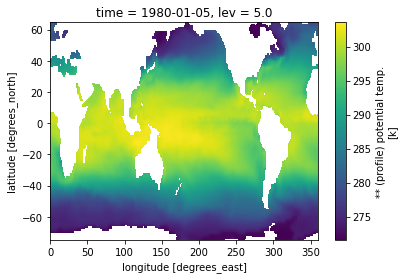

In [7]:
%matplotlib inline
dset.potdsl.isel(time=0,lev=0).plot()

We can also load the data for down to 2000m (levels 0 to 35) and write them to disk in compressed netCDF format

In [8]:
dset.potdsl.isel(time=0,lev=slice(0,35)).to_netcdf('/tmp/temp_file.nc',
                                                   encoding={'potdsl':{'zlib': True,
                                                             'complevel': 4}})